#### In this notebook, I compare the Log Spectral Flux Onset Detection Function to the NINOS² Onset Detection Function (ODF) According to:
``` Mounir, M., Karsmakers, P. & van Waterschoot, T. Musical note onset detection based on a spectral sparsity measure. J AUDIO SPEECH MUSIC PROC. 2021, 30 (2021). https://doi.org/10.1186/s13636-021-00214-7```

In [22]:
import numpy as np
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal.windows import hamming

In [86]:
input_sig, fs = lb.load('../audio/viola.wav', sr=44100)

first thing's first, compute the spectrogram with the STFT

In [100]:
stride = int(0.001*fs)
spectrogram = lb.amplitude_to_db(np.abs(lb.stft(input_sig, n_fft=4096, hop_length=stride, window=hamming)), ref=np.max)
spectrogram.shape

(2049, 5700)

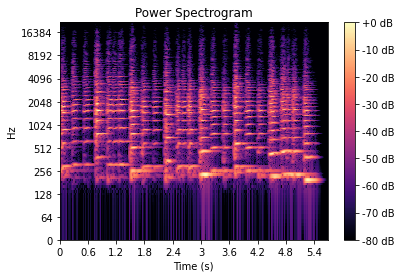

In [128]:
N = spectrogram.shape[0]
fig, ax = plt.subplots()
ax.set_title('Power Spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
img = lb.display.specshow(spectrogram, y_axis='log', x_axis='s', ax=ax, sr=fs, hop_length=stride)

This is the Log Spectral Flux (LSF) ODF; a very simple baseline to compare to.

In [132]:
def log_spectral_flux(x):
    """Return the LSF of x, where x is assumed to be a log-scaled spectrogram."""
    # frequency domain filtering
    half_N = x.shape[0] // 2
    xf = x[:half_N, :] # filter top half of frequency bins
    # vectorized subtraction
    pad = np.zeros((half_N, 1)) # zero padding on first column
    x_prev = np.concatenate((pad, xf), axis=1)[:, :-1] # without last column
    Hx = xf - x_prev
    # half-wave recitification
    LSF = (Hx + np.abs(Hx)) * 0.5
    # sum on frequency axis
    LSF = np.sum(LSF, axis=0)
    return LSF

In [133]:
LSF = log_spectral_flux(spectrogram)

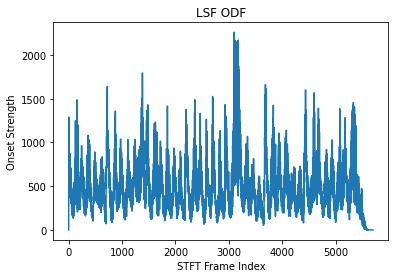

In [134]:
plt.figure()
plt.plot(LSF)
plt.xlabel('STFT Frame Index')
plt.ylabel('Onset Strength')
plt.title('LSF ODF')
plt.show()